# ST5225 Statistical Analysis of Networks — Deep Dive
# Week 1 — Introducton to Networks

## Creating a graph

To create a graph in our Jupyter Notebook, we can use the NetworkX library in Python. NetworkX provides a powerful set of tools for working with graphs, allowing us to create, manipulate, and visualize complex network structures.
In this notebook, we will start by creating an empty graph with no nodes and no edges. This will serve as the foundation for building our network. We will then gradually add nodes and edges to construct a meaningful graph representation.
Let's begin by creating an empty graph using the NetworkX library.

In [236]:
# Import the necessary module
import networkx as nx
import matplotlib.pyplot as plt
# Create an empty graph
G = nx.Graph()

# Print the graph
print(G)

Graph with 0 nodes and 0 edges


## Adding Vertices and Nodes to the Graph

In this section, we will explore how to add vertices and nodes to our graph using the NetworkX library in Python. Vertices and nodes are fundamental components of a graph, representing the entities and connections, respectively.

To add vertices to our graph, we can use the `add_node()` or `add_nodes_from()` methods provided by NetworkX. These methods allow us to add individual vertices or multiple vertices at once, respectively.

To add nodes to our graph, we can use the `add_edge()` or `add_edges_from()` methods. These methods allow us to establish connections between vertices, creating the edges that define the relationships in our graph.
Let's dive into the code and see how we can add vertices and nodes to our graph!


In [237]:
# Add node "A" to the graph
G.add_node("A")

# Print the graph after adding node "A"
print(G)

# Add multiple nodes ["B", "C", "D", "E", "F", "G"] to the graph
G.add_nodes_from(["B", "C", "D", "E", "F", "G"])

# Print the graph after adding multiple nodes
print(G)

Graph with 1 nodes and 0 edges
Graph with 7 nodes and 0 edges


To visualize the graph created using the NetworkX library, we can leverage the power of `matplotlib`. This library provides a wide range of tools and functionalities for creating high-quality visualizations.

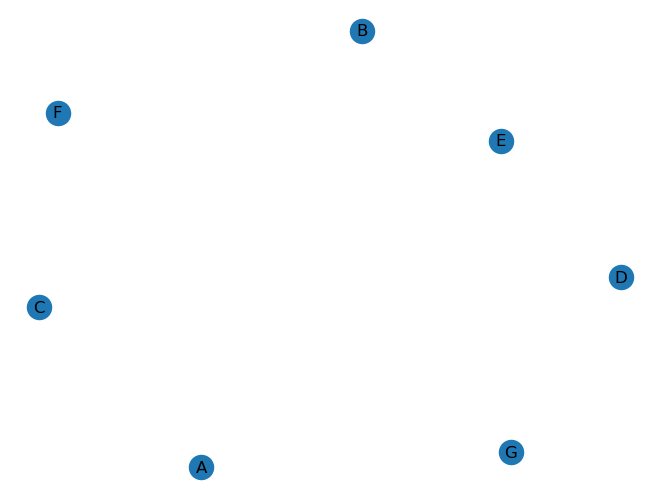

In [238]:
# Import the necessary modules
import matplotlib.pyplot as plt

# Draw the graph with labels
nx.draw(G, with_labels=True)

# Display the graph
plt.show()

Let's add an edge to our graph. 

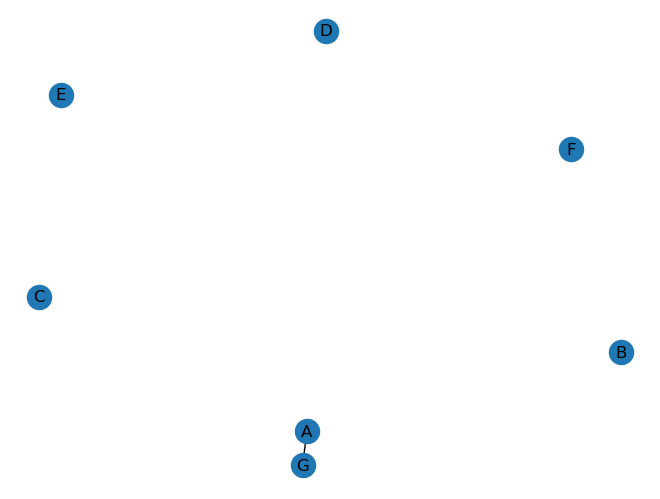

In [239]:
# Add an edge between nodes "A" and "G"
G.add_edge("A", "G")

# Draw the graph with labels
nx.draw(G, with_labels=True)

# Display the graph
plt.show()

Let's add more edges. 

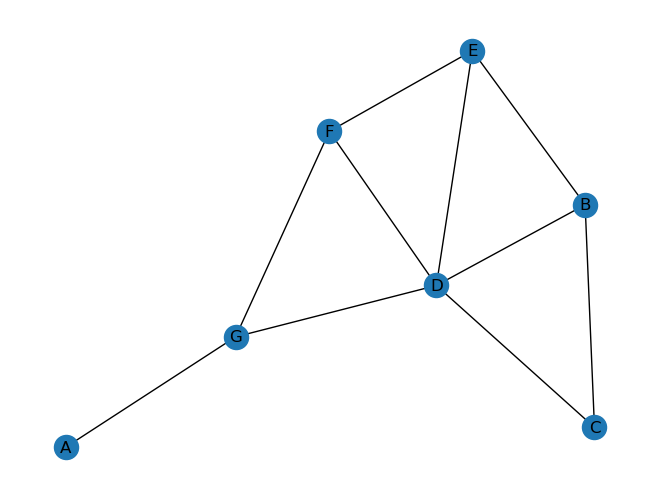

In [240]:
# Add edges to the graph
G.add_edges_from([("G", "F"), ("G", "D"), ("F", "D"), ("F", "E"), ("E", "D"), ("E", "B"), ("B", "C"), ("B", "D"), ("C", "D")])

# Draw the updated graph with labels
nx.draw(G, with_labels=True)
plt.show()

This graph happpens to be a *planar graph*, since it can be plotted on a 2-dimensional surface without any edges crossing. 
Can you add an edge to make it not a planar graph anymore?

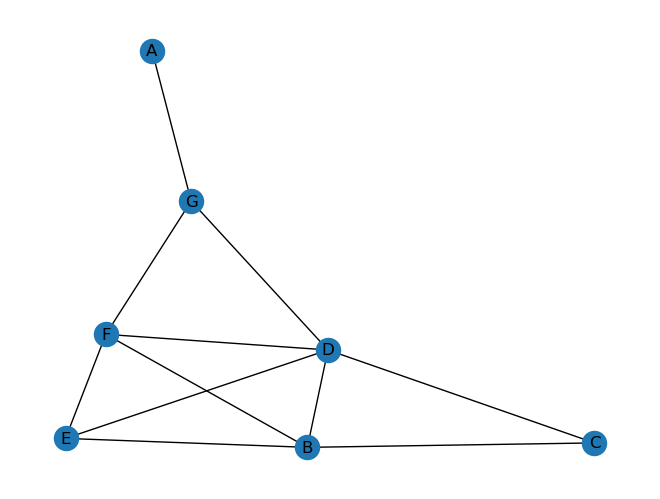

In [241]:
# Add an edge between nodes "F" and "B"
G.add_edge("F","B")

# Draw the updated graph with labels
nx.draw(G, with_labels=True)
plt.show()

## Adjacency matrix

We now extract and manipulate the adjacency matrix from the graph. 

In [242]:
import scipy as sp
import numpy as np

# Extract the adjacency matrix from the graph G_simple
adj_matrix_sparse = nx.adjacency_matrix(G)

# Convert to regular array (Carfull! This can be memory demanding)
adj_matrix = adj_matrix_sparse.toarray()

# Print the adjacency matrix
print(adj_matrix)

[[0 0 0 0 0 0 1]
 [0 0 1 1 1 1 0]
 [0 1 0 1 0 0 0]
 [0 1 1 0 1 1 1]
 [0 1 0 1 0 1 0]
 [0 1 0 1 1 0 1]
 [1 0 0 1 0 1 0]]


We can use the adjacency matrix to calculate the number of walks of a certain length. Recall that a walk allows for multiple visits. 

In [243]:
adj_matrix_2 = np.dot(adj_matrix, adj_matrix)

adj_matrix_2

array([[1, 0, 0, 1, 0, 1, 0],
       [0, 4, 1, 3, 2, 2, 2],
       [0, 1, 2, 1, 2, 2, 1],
       [1, 3, 1, 5, 2, 3, 1],
       [0, 2, 2, 2, 3, 2, 2],
       [1, 2, 2, 3, 2, 4, 1],
       [0, 2, 1, 1, 2, 1, 3]])

The diagonal now contains what is called *degree* of each node, that is, the number of edges connected to each respective node.

In [244]:
adj_matrix_3 = np.dot(adj_matrix_2, adj_matrix)

adj_matrix_3

array([[ 0,  2,  1,  1,  2,  1,  3],
       [ 2,  8,  7, 11,  9, 11,  5],
       [ 1,  7,  2,  8,  4,  5,  3],
       [ 1, 11,  8, 10, 11, 11,  9],
       [ 2,  9,  4, 11,  6,  9,  4],
       [ 1, 11,  5, 11,  9,  8,  8],
       [ 3,  5,  3,  9,  4,  8,  2]])

The diagonal now contains twice the number of 3-cycles (triangles) each node is involved in. Many other quantities of interest can be extracted mathematically from the adjacency matrix.

## Adding attributes

Graphs can be enriched with additional data. This data, known as *attributes*, can be associated with each node and edge individually. Although NetworkX provides the capability to assign unique attributes to each node and edge, it's common for them to share a set of attributes. A frequently used attribute is *weight*.

In [245]:
# Import the random module
import random 

# Generate random weights for each node in the graph G
weights = {node: random.random() for node in G.nodes()}

# Set the 'weight' attribute for each node in the graph G
nx.set_node_attributes(G, weights, 'weight')

# Access the attributes of node "A" in the graph G
G.nodes["A"]

{'weight': 0.19379813871730944}

We can use these attributes for statistical analysis, but also for visialisation.

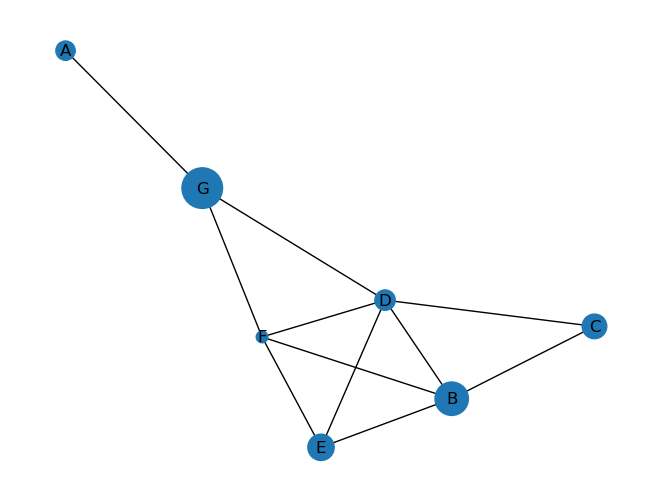

In [246]:
# Get the weights of each node in the graph G and multiply them by 1000
weights = [G.nodes[n]['weight']*1000 for n in G.nodes()]

# Draw the graph with labels and node sizes based on the weights
nx.draw(G, with_labels=True, node_size=weights)

# Display the graph
plt.show()

## Importing graph from a file

In most instances, we will not create a graph manually as done in the previous sections. Instead, data is stored in one or more files, and we write code to construct a graph from that data.

Let's consider again the RFID data. It comes in two files, one file describing the nodes (doctors, patients, nursing staff, admin staff) and one file describing the interactions.

Here the CSV file describing the nodes:

```
"ID","status"
1,"ADM"
2,"NUR"
3,"NUR"
4,"NUR"
5,"NUR"
6,"NUR"
7,"NUR"
8,"NUR"
9,"MED"
10,"NUR"
11,"MED"
12,"MED"
13,"NUR"
14,"MED"
15,"MED"
...
```

Here is the CSV file describing the interactions:
```
"ID1","ID2","time"
15,31,140
15,22,160
15,16,500
15,16,520
16,22,560
16,22,580
16,22,600
16,22,620
16,22,680
11,16,680
11,22,700
...
````

In [247]:
# Import additional modules
import pandas as pd

# Load CSV files
nodes_df = pd.read_csv('rfid_lyon_people.csv')  # Read the nodes CSV file
edges_df = pd.read_csv('rfid_lyon_contacts.csv')  # Read the edges CSV file


We can now construct a multigraph from this data. 

In [248]:
# Create a new graph
G = nx.MultiGraph()

# Add nodes with status attribute
for _, row in nodes_df.iterrows():
  node_id = row['ID']
  status = row['status']
  G.add_node(node_id, status=status)

# Add edges with time attribute
for _, row in edges_df.iterrows():
  node1 = row['ID1']
  node2 = row['ID2']
  time = row['time']
  G.add_edge(node1, node2, time=time)

print("Node attributes:", G.nodes.data())
print("Edge attributes:", G.edges.data())

Node attributes: [(1, {'status': 'ADM'}), (2, {'status': 'NUR'}), (3, {'status': 'NUR'}), (4, {'status': 'NUR'}), (5, {'status': 'NUR'}), (6, {'status': 'NUR'}), (7, {'status': 'NUR'}), (8, {'status': 'NUR'}), (9, {'status': 'MED'}), (10, {'status': 'NUR'}), (11, {'status': 'MED'}), (12, {'status': 'MED'}), (13, {'status': 'NUR'}), (14, {'status': 'MED'}), (15, {'status': 'MED'}), (16, {'status': 'MED'}), (17, {'status': 'NUR'}), (18, {'status': 'MED'}), (19, {'status': 'ADM'}), (20, {'status': 'NUR'}), (21, {'status': 'NUR'}), (22, {'status': 'MED'}), (23, {'status': 'NUR'}), (24, {'status': 'NUR'}), (25, {'status': 'NUR'}), (26, {'status': 'NUR'}), (27, {'status': 'NUR'}), (28, {'status': 'ADM'}), (29, {'status': 'NUR'}), (30, {'status': 'MED'}), (31, {'status': 'ADM'}), (32, {'status': 'NUR'}), (33, {'status': 'NUR'}), (34, {'status': 'NUR'}), (35, {'status': 'MED'}), (36, {'status': 'NUR'}), (37, {'status': 'NUR'}), (38, {'status': 'PAT'}), (39, {'status': 'PAT'}), (40, {'status': 

We can check whether the graph is a multigraph or a simple graph.

In [249]:
if G.is_multigraph():
  print("G is a multigraph.")
else:
  print("G is a simple graph.")

G is a multigraph.


## Manipulating the graph

We have read in the raw data and converted into a multigraph, which in fact contatins all the original information. We can manipulate the graph and create different version, depending on what we need. 

Below, we take the multigraph, and convert it into a simple graph. The number of multiedges will be turned into an edge attribute called `count`.

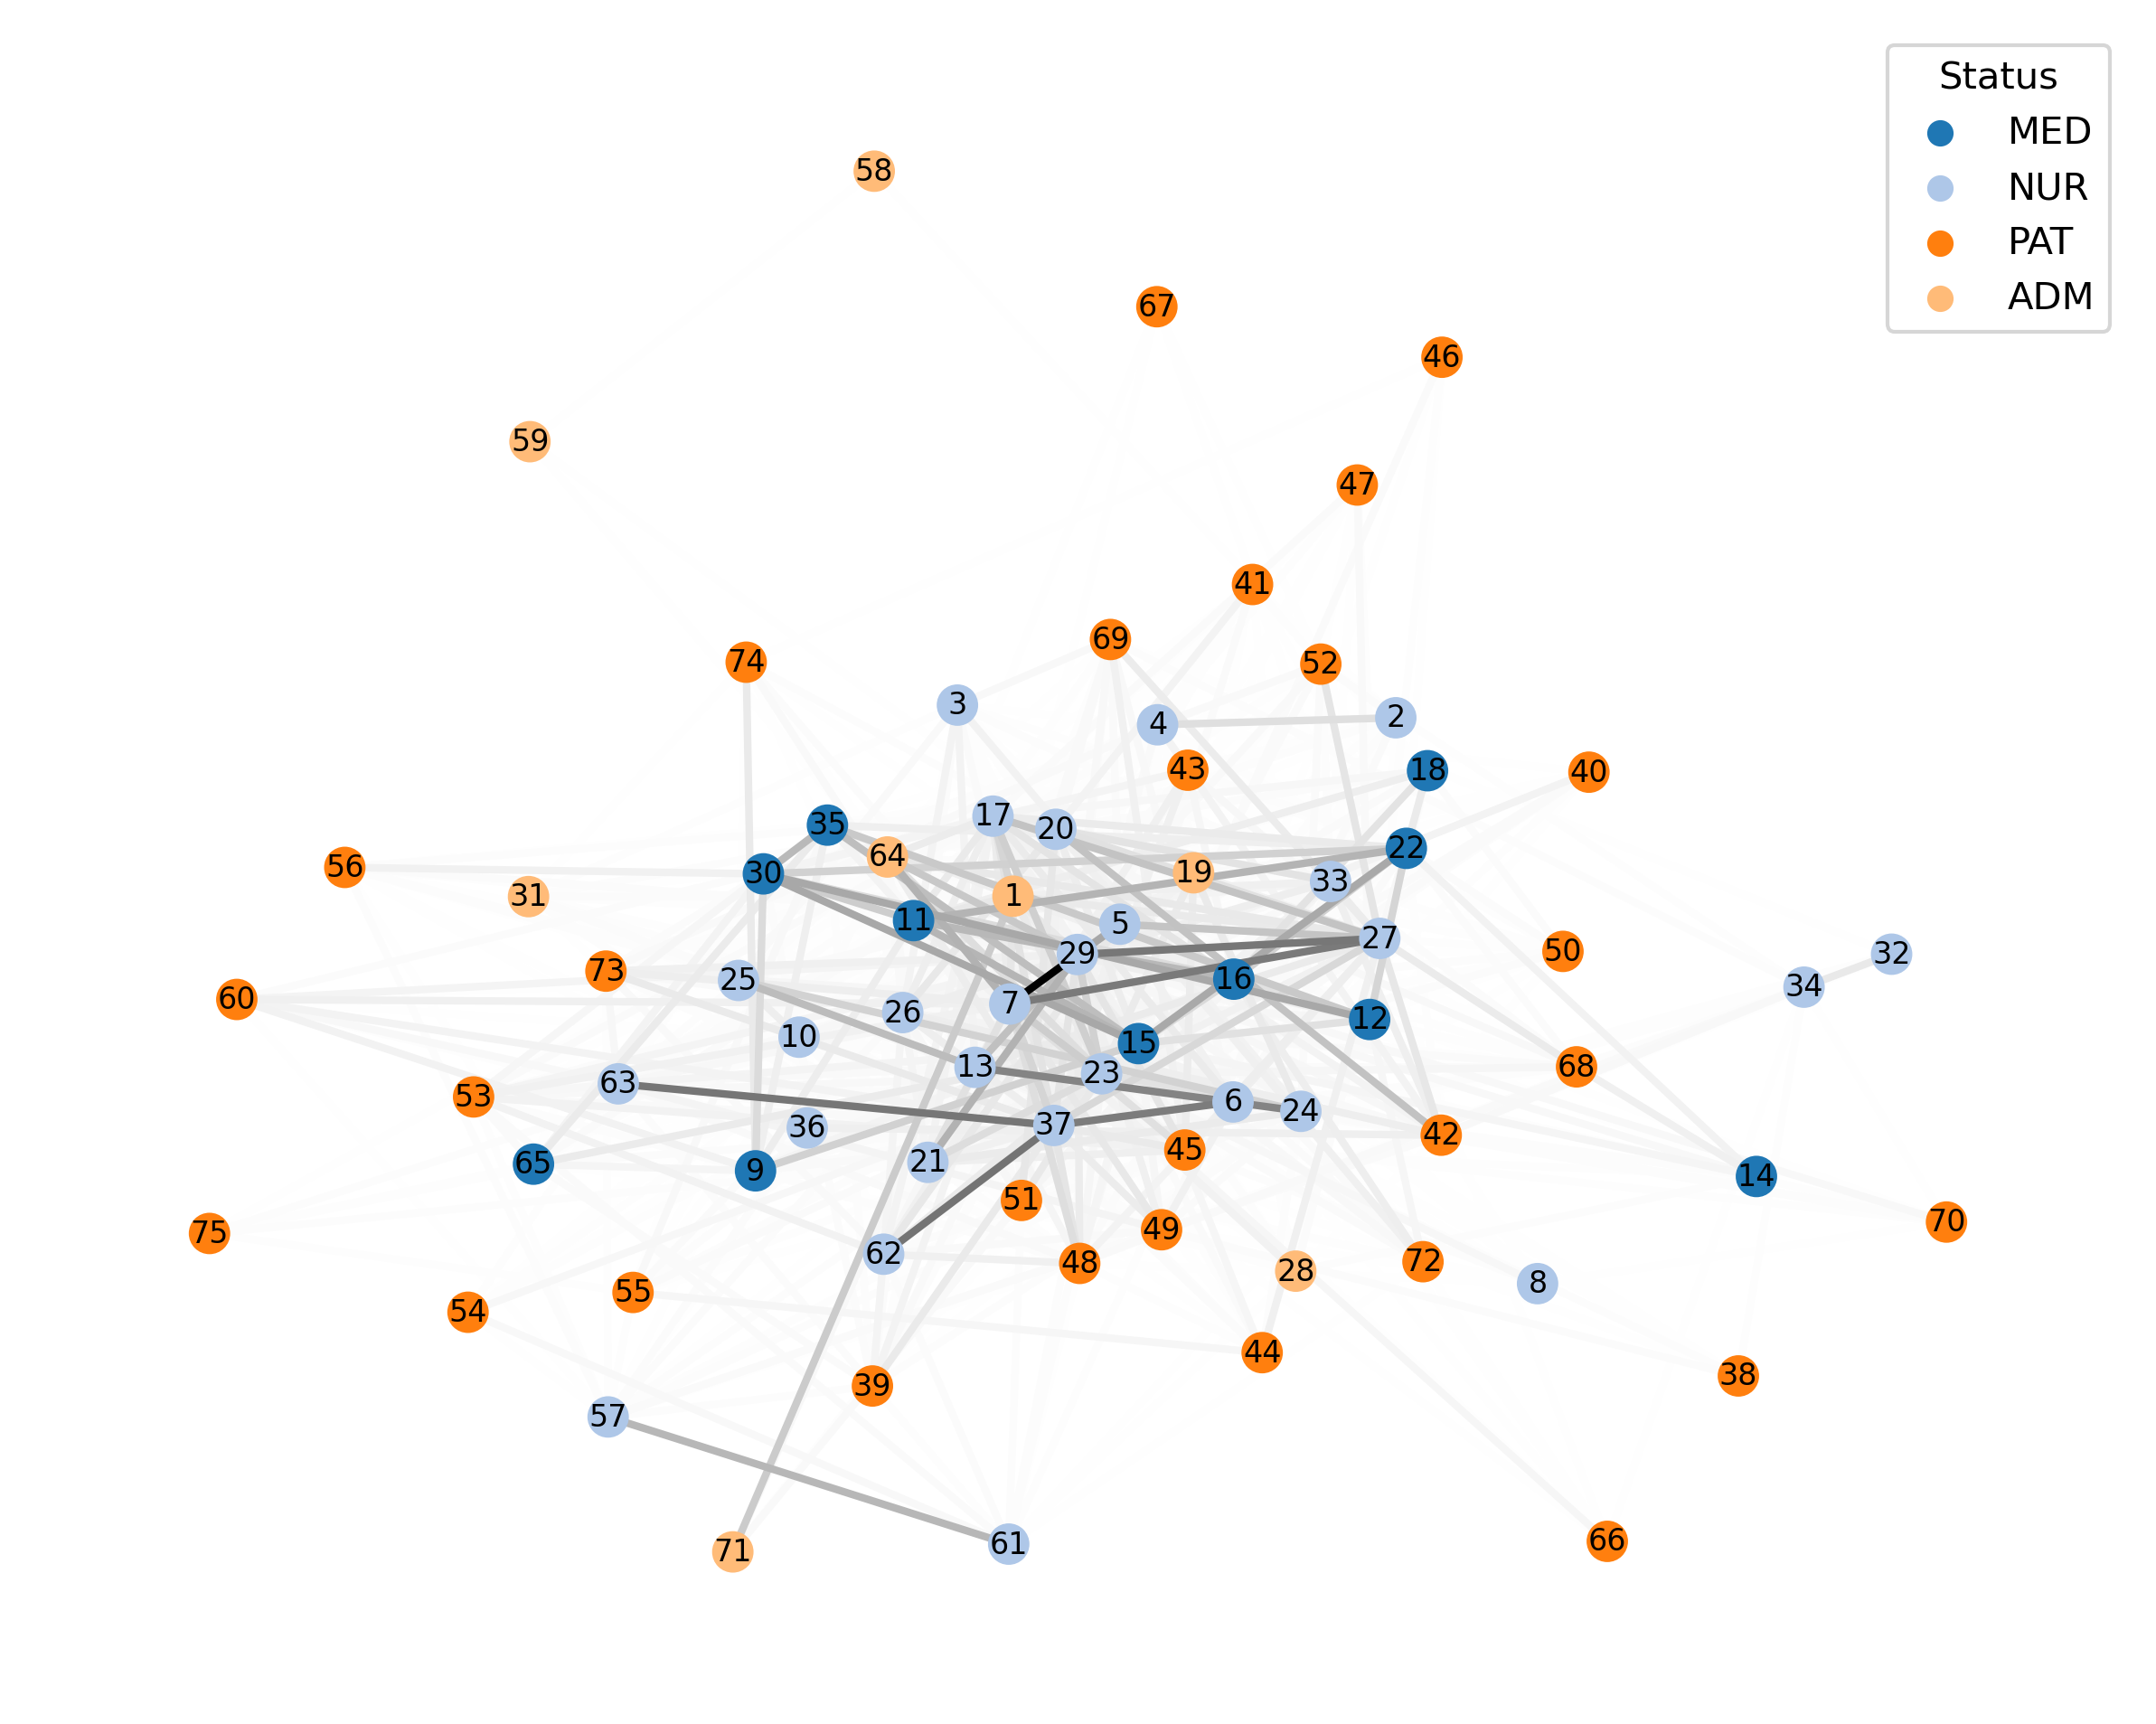

In [250]:
# Convert MultiGraph to a simple graph
G_simple = nx.Graph(G)

# Count the edges from the MultiGraph and add as edge attribute in the simple graph
for u, v in G_simple.edges():
    G_simple[u][v]['count'] = G.number_of_edges(u, v)

# Define a color map based on the unique statuses for nodes
unique_statuses = set(nodes_df['status'].unique())
color_map = {status: plt.cm.tab20(i) for i, status in enumerate(unique_statuses)}

# Determine the maximum count of edges for color mapping
max_count = max(nx.get_edge_attributes(G_simple, 'count').values())

# Visualization setup
plt.figure(figsize=(10, 8), dpi=300)
pos = nx.spring_layout(G_simple)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G_simple, pos, node_color=[color_map[G_simple.nodes[node]['status']] for node in G_simple], node_size=100)

# Sort edges by count and prepare color list
sorted_edges = sorted(G_simple.edges(data=True), key=lambda x: x[2]['count'])
edge_colors = [(1 - (data['count'] / max_count), ) * 3 for _, _, data in sorted_edges]

# Draw edges
nx.draw_networkx_edges(G_simple, pos, edgelist=[(u, v) for u, v, _ in sorted_edges], width=2, edge_color=edge_colors)

# Draw labels
nx.draw_networkx_labels(G_simple, pos, font_size=8)

# Create a legend for the node colors
for status, color in color_map.items():
    plt.scatter([], [], color=color, label=status)
plt.legend(title="Status", loc='best', bbox_to_anchor=(1, 1))

plt.axis('off')  # Turn off the axis
plt.show()


## Components

Let us extract the components of the graph. 

First we extract a subgraph consisting of only those edges with edge count bigger or equal to 10.

In [251]:
G_sub = nx.Graph(G_simple)
edges_to_remove = [(u, v) for u, v, attr in G_sub.edges(data=True) if attr['count'] <= 120]
G_sub.remove_edges_from(edges_to_remove)

isolated_nodes = list(nx.isolates(G_sub))
G_sub.remove_nodes_from(isolated_nodes)

components = list(nx.connected_components(G_sub))

for i, component in enumerate(components):
  print(f"Component {i+1}: {component}")

Component 1: {1, 5, 6, 7, 13, 17, 20, 21, 23, 24, 25, 27, 29, 37, 42, 45, 48, 62, 63, 64, 71}
Component 2: {2, 4}
Component 3: {35, 9, 11, 12, 15, 16, 22, 30}
Component 4: {57, 61}


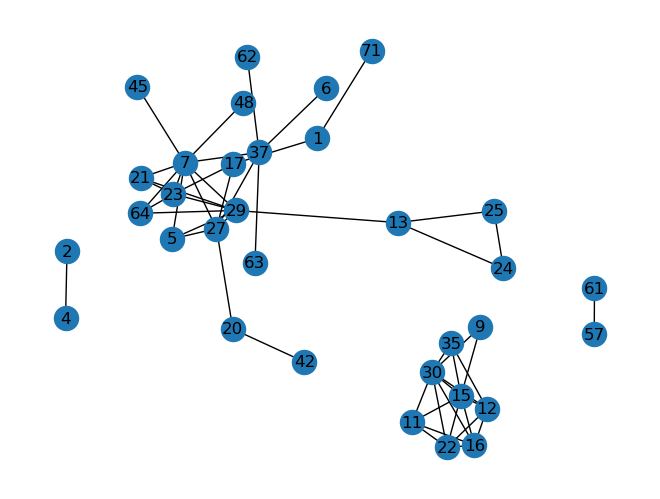

In [252]:
# Set the desired edge length
edge_length = 0.5

# Set the layout algorithm to spring layout with a custom edge length
pos = nx.spring_layout(G_sub, k=edge_length)

# Draw the graph with labels and adjusted layout
nx.draw(G_sub, pos=pos, with_labels=True)


## Bipartite graph

We now extract a bipartite graph from the data, consisting only of patients and nursing staff.

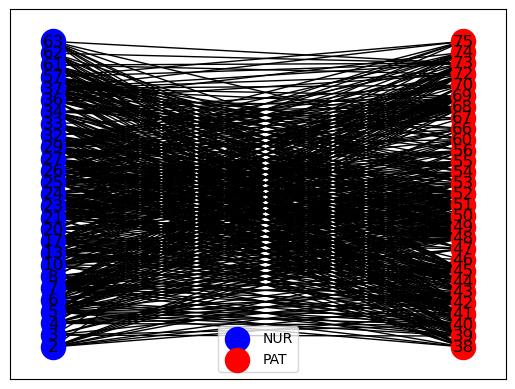

In [253]:
# Create an empty graph for the subgraph
G_bipartite = nx.Graph()

# Iterate over the nodes in G_simple
for node, data in G_simple.nodes(data=True):
  if data['status'] in ['NUR', 'PAT']:
    G_bipartite.add_node(node, **data)

# Iterate over the edges in G_simple
for u, v, data in G_simple.edges(data=True):
  if (G_simple.nodes[u]['status'] == 'NUR' and G_simple.nodes[v]['status'] == 'PAT') or (G_simple.nodes[u]['status'] == 'PAT' and G_simple.nodes[v]['status'] == 'NUR'):
    G_bipartite.add_edge(u, v, **data)

# Set the layout algorithm to bipartite layout
pos = nx.bipartite_layout(G_bipartite, [node for node, data in G_bipartite.nodes(data=True) if data['status'] == 'NUR'])

# Separate the nodes based on their status
nur_nodes = [node for node, data in G_bipartite.nodes(data=True) if data['status'] == 'NUR']
pat_nodes = [node for node, data in G_bipartite.nodes(data=True) if data['status'] == 'PAT']

# Draw the bipartite graph with different colors for each side
nx.draw_networkx_nodes(G_bipartite, pos, nodelist=nur_nodes, node_color='blue', label='NUR')
nx.draw_networkx_nodes(G_bipartite, pos, nodelist=pat_nodes, node_color='red', label='PAT')
nx.draw_networkx_edges(G_bipartite, pos)

# Draw the labels
nx.draw_networkx_labels(G_bipartite, pos)

# Display the graph
plt.legend()
plt.show()

## Trees

The interest in networks like the hospital contact data is to understand the spread of an infectious disease in a healthcare setting. We can simulate a so-called SIR epidemic (*S*usceptible, *I*nfectious, *R*ecovered). The result will be a tree.

The simulation begins by randomly selecting one individual to be infected, marking the start of the epidemic.

From this initial infection, the disease spreads through the population according to a probabilistic process. Each infected individual has a chance to transmit the disease to their neighbors via the edges connecting them. Specifically, for each contact an infected individual has, there is a certain probability, denoted by $p$, that the disease will be passed along that edge to the neighboring individual. If a susceptible neighbor becomes infected, the edge connecting them to the original infected individual is added to an infection tree, which tracks the path of the epidemic.

The simulation continues in this manner, with infected individuals potentially infecting their neighbors, until no more susceptible neighbors are left to infect. Infected individuals eventually recover, transitioning from an infected state to a recovered state, indicating they can no longer spread the disease. The process repeats, with new infections arising and previous ones resolving, until the infection can no longer propagate because all infected individuals have either recovered or there are no more susceptible individuals to infect.

The resulting infection tree visually represents the pathways through which the disease spread throughout the hospital, showing the sequence and connections of infections from the initial outbreak to its eventual containment. This simulation provides insight into how diseases can propagate through networks of individuals and the role that network structure plays in the spread of epidemics.

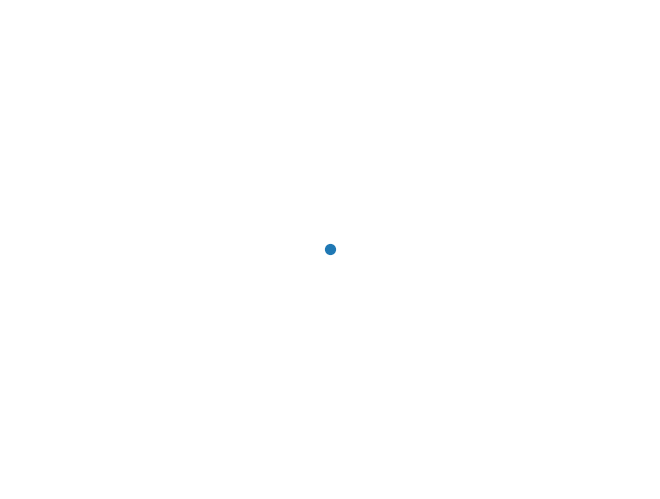

In [257]:
import random
import networkx as nx

def simulate_epidemic(G, p):
    """
    Simulates the spread of a disease through a population represented by a graph G,
    with each edge representing a possible transmission with probability p.
    
    Parameters:
    G (networkx.Graph or networkx.MultiGraph): The graph representing the population.
    p (float): The probability of infection transmission through an edge.
    
    Returns:
    networkx.Graph: The infection tree representing the spread of the disease.
    """
    # Set all nodes to 'susceptible'
    for node in G.nodes():
        G.nodes[node]['disease_status'] = 'susceptible'

    # Create an empty graph for the infection tree
    T = nx.Graph()

    # Pick a random vertex and infect it
    random_vertex = random.choice(list(G.nodes()))
    T.add_node(random_vertex)
    G.nodes[random_vertex]['disease_status'] = 'infected'

    # Set of currently infected nodes
    infected_set = set([random_vertex])

    while True:
        if not infected_set:
            break
        
        # Pick a random infected vertex
        infected_vertex = random.choice(list(infected_set))
        
        # Get the edges connected to the infected vertex
        edges = list(G.edges(infected_vertex))
        
        # Infect each neighbor via each edge with a probability p
        for edge in edges:
            neighbor = edge[1] if edge[0] == infected_vertex else edge[0]
            if G.nodes[neighbor]['disease_status'] == 'susceptible' and random.random() < p:
                G.nodes[neighbor]['disease_status'] = 'infected'
                T.add_edge(infected_vertex, neighbor)
                infected_set.add(neighbor)
        
        # Set the current infected vertex to recovered
        G.nodes[infected_vertex]['disease_status'] = 'recovered'
        infected_set.remove(infected_vertex)
    
    return T

# Example usage:
p = 0.007  # Define the infection probability
T = simulate_epidemic(G, p)

# Draw the tree T using planar_layout
if len(T) == 1:
    pos = {list(T.nodes())[0]: (0, 0)}
else:
    pos = nx.bfs_layout(T, list(T.nodes())[0])

# Draw the tree with labels
nx.draw(T, pos, with_labels=False, node_size=50, arrows=True, arrowstyle='->', arrowsize=5)


We can use this to calculate the probability of an epidemic (T has more than one node), as well as the epidemic size distribution.

Probability of an epidemic (size > 10): 0.819


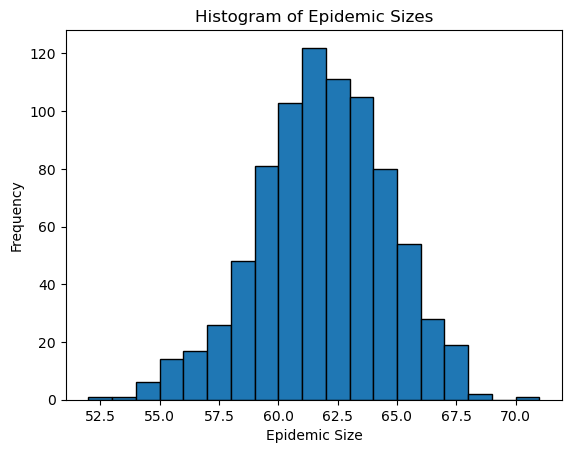

In [260]:
epidemic_sizes = []  # List to store the final size of the epidemic
p = 0.007

for _ in range(1000):
  # Run the simulation code here
  T = simulate_epidemic(G, p)
  # Assuming the final size of the epidemic is stored in variable 'T'
  epidemic_sizes.append(len(T))

epidemic_count = sum(1 for size in epidemic_sizes if size > 10)
probability = epidemic_count / len(epidemic_sizes)
print("Probability of an epidemic (size > 10):", probability)

# Filter out the epidemic sizes that are not equal to 1
filtered_sizes = [size for size in epidemic_sizes if size > 10]

# Plot the histogram
plt.hist(filtered_sizes, bins=range(min(filtered_sizes), max(filtered_sizes) + 2), edgecolor='black')

# Set the labels and title
plt.xlabel('Epidemic Size')
plt.ylabel('Frequency')
plt.title('Histogram of Epidemic Sizes')

# Display the histogram
plt.show()